In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Step 1: Database Connection
connection = mysql.connector.connect(
    user='root',
    password='tysql0',
    host='localhost',
    database='ecommerce'
)
cursor = connection.cursor()

In [3]:
# Step 2: Fetch Data
# Fetch customer data from customer table
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [4]:
# Fetch product data from product table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [5]:
# Fetch order details data
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [6]:
# Step 3: Data Cleaning
customer_data['pin_code'] = customer_data['pin_code'].astype(str)
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

In [10]:
# Prevent column wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
#printing first 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no                   address pin_code
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652                  f.g.road       99
1       C1002     john            Sydney         john@gmail.com  9987234567                  k.c.road    75001
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567             2F Ikenobecho      171
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567           24-2, Sendagaya     8429
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678  1520 E Buena Vista Drive    32830
  product_id product_name     category sub_category  original_price  selling_price  stock
0       P102        Chair    furniture       Chairs         20000.0       15000.00     10
1       P103       Laptop  Electronics     computer         60000.0       55000.00     50
2       P104   Smartphone  Electronics        phone         4500

In [12]:
#Customer Analysis 

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


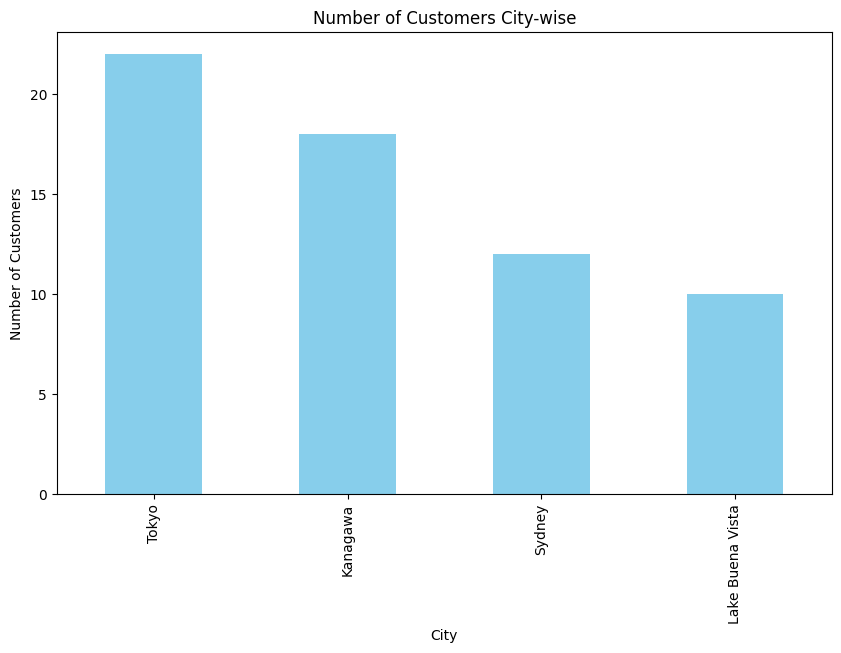

In [13]:
# Visualizations
# 1. Identify the total number of customers city-wise
city_wise_customers = customer_data['city'].value_counts()
print (city_wise_customers)
plt.figure(figsize=(10, 6))
city_wise_customers.plot(kind='bar', color='skyblue')

# Labels and title
plt.title('Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
# plt.xticks(rotation=45)
# plt.tight_layout()

# Show the plot
plt.show()

customer_id
C1005    3
C1010    3
C1009    3
C1013    3
C1006    2
C1008    2
C1003    2
C1014    2
C1011    2
C1015    2
Name: count, dtype: int64


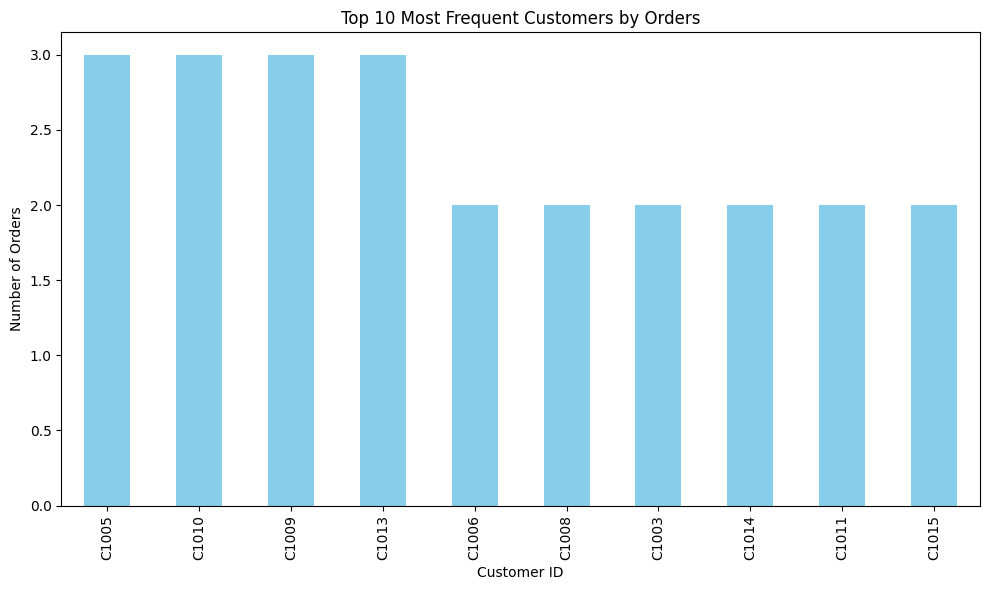

In [14]:
# 2.  Identify the most frequent customers based on their order history

frequent_customers = order_data['customer_id'].value_counts().head(10)
print (frequent_customers)  # print most frequent customer

plt.figure(figsize=(10, 6))
frequent_customers.plot(kind='bar', color='skyblue')

# Labels and title
plt.title('Top 10 Most Frequent Customers by Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
#Product Analysis 

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64


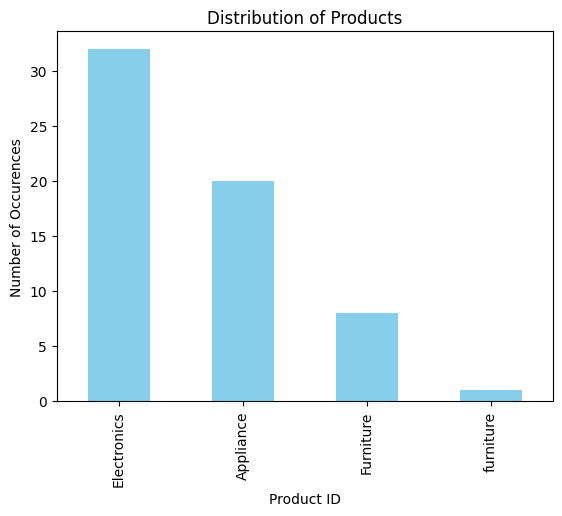

In [16]:
# 3. Determine the total products available by category
df= (product_data['category'].value_counts())
print (df) 
df.plot(kind ='bar', color='skyblue')

# Labels and title
plt.xlabel('Product ID')
plt.ylabel('Number of Occurences')
plt.title('Distribution of Products')

# Show the plot
plt.show()

sub_category
Electronics      20
Computers         9
Wearables         5
Audio             3
Entertainment     3
Chairs            2
Lamps             2
Accessories       2
Tablets           2
computer          1
Mobiles           1
phone             1
TVs               1
Desks             1
Cameras           1
Sofas             1
Tables            1
chairs            1
Consoles          1
Printers          1
Furniture         1
Photography       1
Name: count, dtype: int64


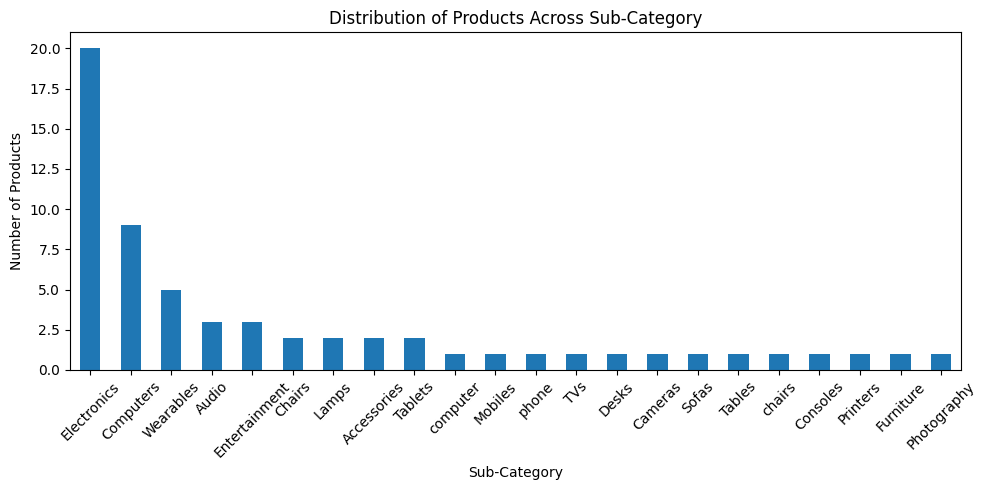

In [38]:
# 4.Analyze the distribution of products across sub-categories

subcategory_distribution = product_data['sub_category'].value_counts()
print (subcategory_distribution) 

plt.figure(figsize=(10, 5))
subcategory_distribution.plot(kind='bar', color='#1f77b4')

# lebel and title 
plt.title('Distribution of Products Across Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()

# show the plot
plt.show()

   product_id         product_name     category sub_category  original_price  selling_price  stock
0        P102                Chair    furniture       Chairs         20000.0        15000.0     10
3        P105              Blender    Appliance  Electronics           500.0          450.0     10
10       P112                chair    Furniture       chairs          1000.0          800.0     10
12       P114         Refrigerator    Appliance  Electronics         20000.0        18000.0     12
30       P132             Sofa Set    Furniture    Furniture         50000.0        45000.0     10
33       P135           Dishwasher    Appliance  Electronics         18000.0        15000.0     12
39       P141              Printer  Electronics    Computers         12000.0        10000.0     10
42       P144  External Hard Drive  Electronics    Computers          5000.0         4000.0     12
46       P148               Tablet  Electronics    Computers         30000.0        25000.0     10
          

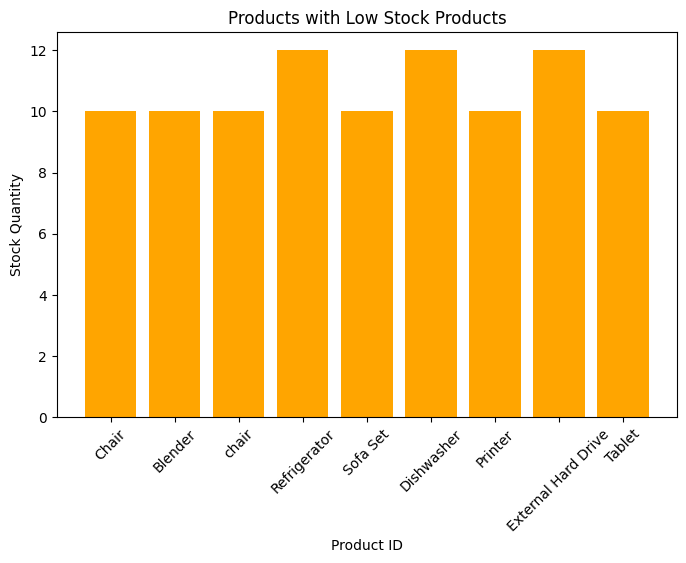

In [56]:
# 5. Identify the products with low stock levels

low_stock_products = product_data[product_data['stock'] < 15]
print(low_stock_products)
print (low_stock_products[['product_name', 'stock']])

low_stock_products[['product_name', 'stock']]
plt.figure(figsize=(8, 5))
plt.bar(low_stock_products['product_name'],low_stock_products['stock'], color='orange')
plt.title('Products with Low Stock Products')
plt.xlabel('Product ID')
plt.ylabel('Stock Quantity')
plt.xticks(rotation=45)

plt.show()

Text(0.5, 1.0, 'Average, Minimum, Maximum Price for Products')

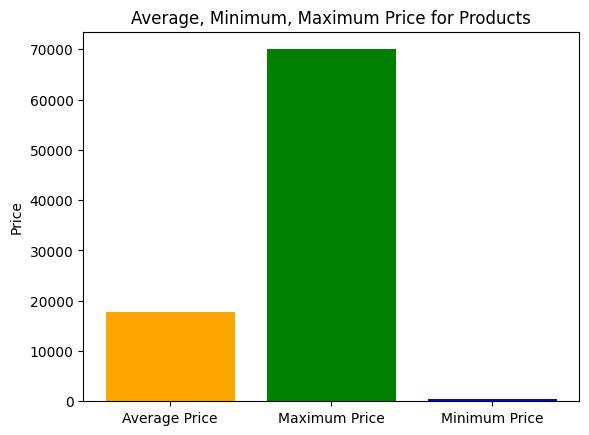

In [25]:
# 6. Calculate the average, maximum, and minimum selling prices for products
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()
price_summary = pd.DataFrame({
    'Metric': ['Average Price', 'Maximum Price', 'Minimum Price'],
    'Value': [average_price, max_price, min_price]
})
plt.bar(price_summary['Metric'], price_summary['Value'], color=['orange', 'green', 'blue'])
plt.ylabel("Price")
plt.title("Average, Minimum, Maximum Price for Products")

In [27]:
# Order Analysis

product_name
Tablet            4
Smartwatch        3
Vacuum Cleaner    3
Desk Lamp         2
Microwave Oven    2
Gaming Console    2
Printer           2
Digital Camera    2
Headphones        2
Television        2
Name: count, dtype: int64


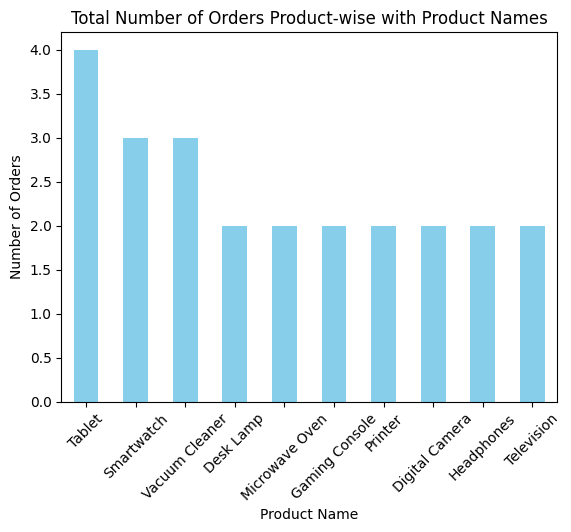

In [28]:
# 7. Calculate the top 10 orders product-wise

df=product_data['product_name'].value_counts().head(10) # Distribution of products across sub category
print(df)

df.plot(kind='bar', color='skyblue')
plt.xlabel("Product Name")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders Product-wise with Product Names")
plt.xticks(rotation=45)
plt.show()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


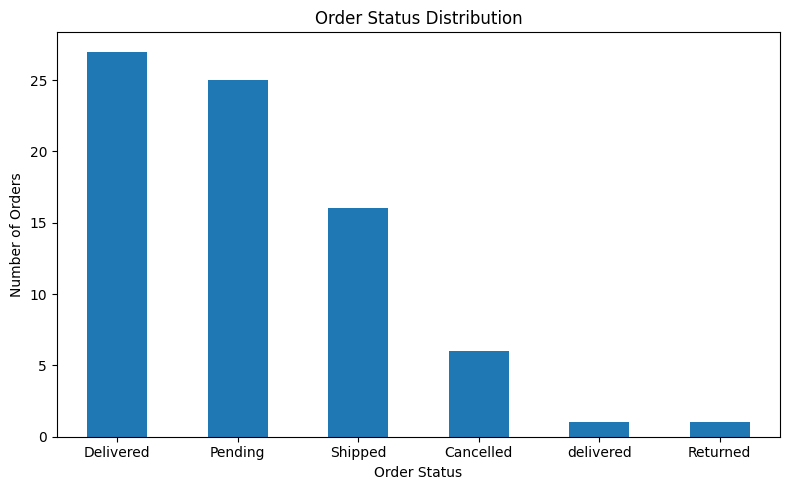

In [37]:
# 8. Order status distribution
order_status_distribution = order_data['order_status'].value_counts()
print (order_status_distribution)
plt.figure(figsize=(8, 5))
order_status_distribution.plot(kind='bar', color='#1f77b4')

plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

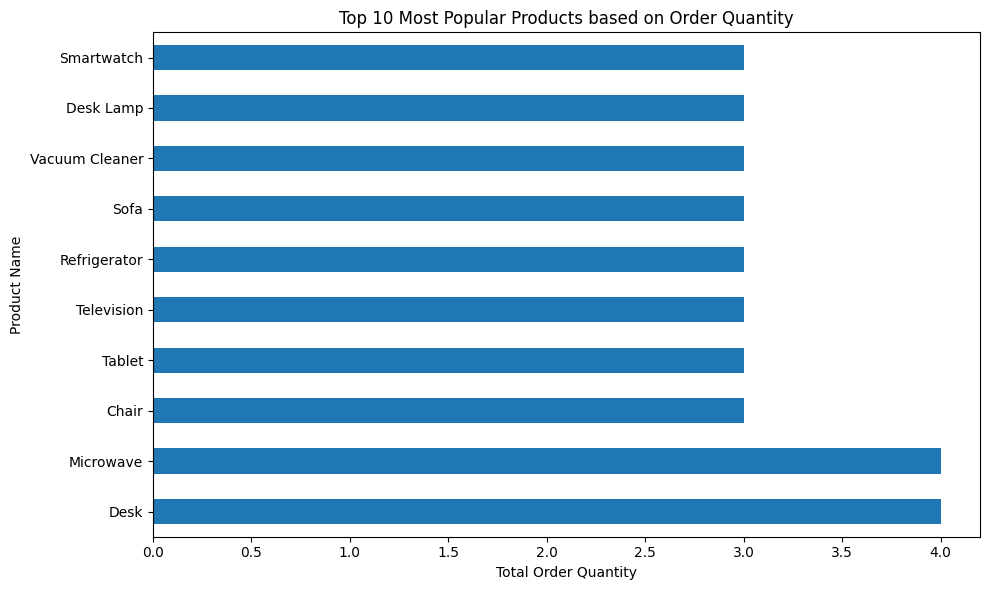

In [48]:
# 9. Identify the most popular products based on order quantity.

top_products = order_data.groupby('product_id')['quantity'].sum().nlargest(10)
product_names = product_data.set_index('product_id').loc[top_products.index, 'product_name']
plt.figure(figsize=(10, 6))
top_products.index = product_names
top_products.plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Most Popular Products based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [49]:
#Sales Analysis 

Product_id Product_Names product_id
P103          Laptop
P111      Television
P132        Sofa Set
P109          Tablet
P108            Desk
P113    Dining Table
P130      Television
P102           Chair
P136    Air Purifier
P112           chair
Name: product_name, dtype: object product_id
P103    110000.0
P111     94000.0
P132     90000.0
P109     87000.0
P108     74000.0
P113     70000.0
P130     70000.0
P102     55000.0
P136     54000.0
P112     51000.0
Name: total_price, dtype: float64


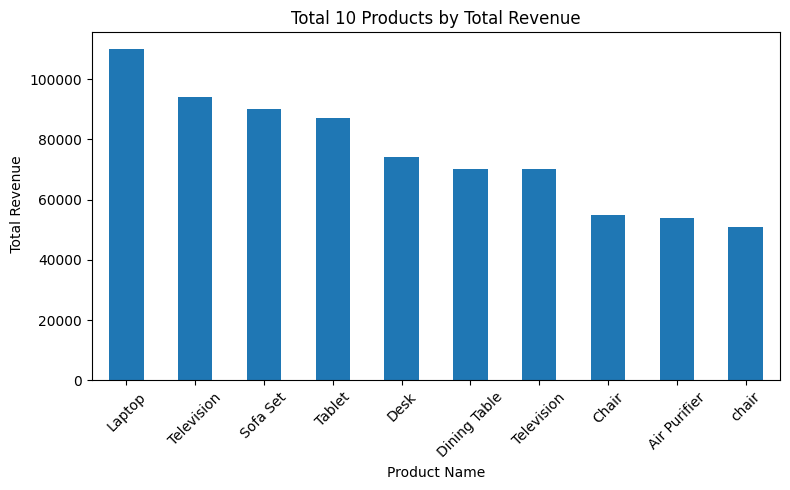

In [72]:
# 9.  Calculate total revenue generated from orders product wise
product_revenue = order_data.groupby('product_id')['total_price'].sum().nlargest(10)
product_names = product_data.set_index('product_id').loc[product_revenue.index, 'product_name']
plt.figure(figsize=(8, 5))
product_revenue.index = product_names
product_revenue.plot(kind='bar', color='#1f77b4')
plt.title('Total 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel(' Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

      category  total_price  percentage
0    Appliance     327900.0   20.669440
1  Electronics     829000.0   52.256682
2    Furniture     374500.0   23.606909
3    furniture      55000.0    3.466969


Text(0.5, 1.0, 'Total Revenue Percentage for Each Category')

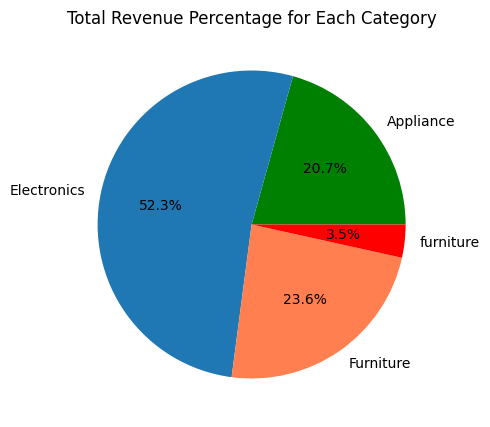

In [63]:
# 11. Calculate total revenue product category-wise percentage
merged_df = order_data.merge(product_data, on='product_id')
category_revenue = merged_df.groupby('category')['total_price'].sum().reset_index()
category_revenue['percentage'] = (category_revenue['total_price'] / category_revenue['total_price'].sum()) * 100
print(category_revenue)

plt.figure(figsize=(5, 5))
plt.pie(category_revenue['total_price'], labels=category_revenue['category'], autopct='%2.1f%%', colors=['green', '#1f77b4', 'coral', 'red'])
plt.title("Total Revenue Percentage for Each Category")

Total_Revenue 1586400.0


Text(0.5, 1.0, 'Total Revenue Generated from All Orders')

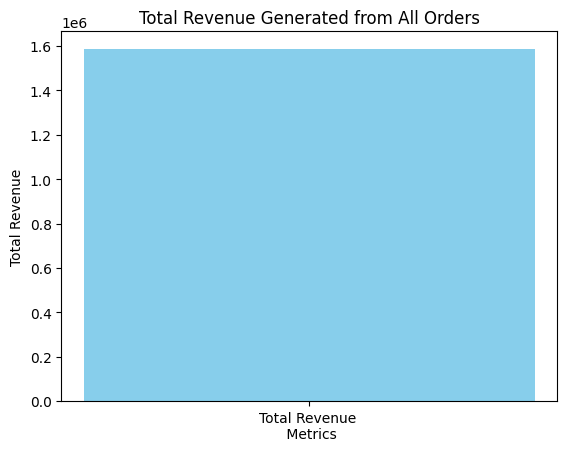

In [70]:
# 12. Calculate the total revenue generated from all orders
total_revenue = order_data['total_price'].sum()
print("Total_Revenue",total_revenue)
# Plot bar chart
plt.bar(['Total Revenue \n Metrics'], [total_revenue], color='skyblue')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated from All Orders')

           product_name  profit
3               Blender   -50.0
10                chair  -200.0
17            Desk Lamp  -500.0
49         Gaming Mouse  -500.0
52       Wireless Mouse  -500.0
58     Portable Speaker  -500.0
59          Smart Scale  -500.0
16           Headphones -1000.0
42  External Hard Drive -1000.0
44         Coffee Maker -1000.0


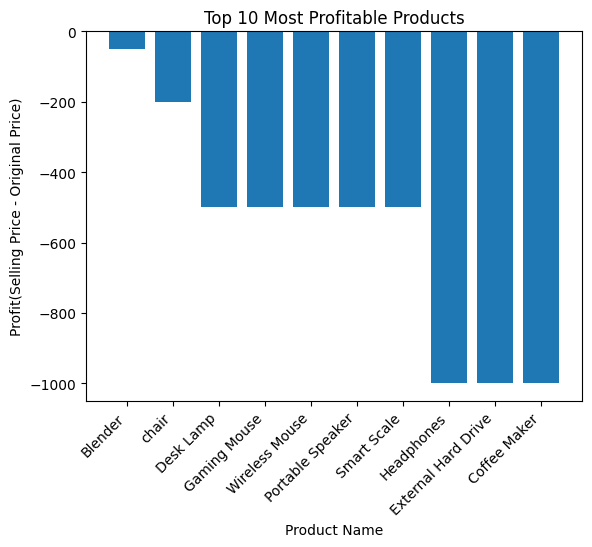

In [73]:
# 13. Identify the most profitable products based on the difference between original and selling prices.

product_data['profit'] = product_data['selling_price'] - product_data['original_price']
profitable_products = product_data.nlargest(10, 'profit') # get top 10

plt.bar(profitable_products['product_name'], profitable_products['profit'], color='#1f77b4')
plt.xlabel("Product Name")
plt.ylabel("Profit(Selling Price - Original Price)")
plt.title("Top 10 Most Profitable Products")
plt.xticks(rotation=45, ha='right')

print(profitable_products[['product_name', 'profit']])

In [74]:
#Customer Order Patterns

Text(0.5, 1.0, 'total Quantity of Highest & Lowest Ordered Products')

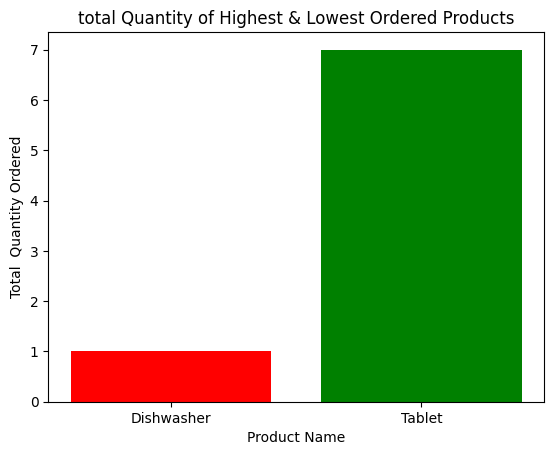

In [76]:
# 14. Identify product names with the highest and lowest order quantities.
product_orders = order_data.merge(product_data, on='product_id').groupby("product_name")["quantity"].sum()
highest_ordered_product = product_orders.idxmax()
lowest_ordered_product = product_orders.idxmin()
highest_quantity = product_orders.max()
lowest_quantity = product_orders.min()
top_bottom_products = {
    lowest_ordered_product: lowest_quantity,
    highest_ordered_product: highest_quantity    
}

plt.bar(top_bottom_products.keys(), top_bottom_products.values(), color=['red', 'green'])
plt.xlabel("Product Name")
plt.ylabel("Total  Quantity Ordered")
plt.title("total Quantity of Highest & Lowest Ordered Products")

Highest Order Quantity: 5.0 by Oliver
Lowest Order Quantity: 1.0 by Jackson


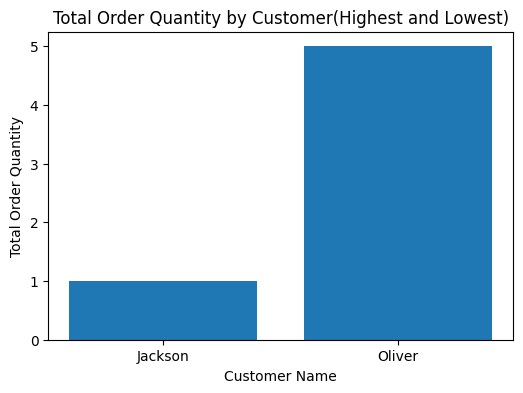

In [77]:
#15. Identify customers with the highest and lowest order quantities

customer_order_quantities = order_data.groupby('customer_id')['quantity'].sum()
highest_order_customer = customer_order_quantities.idxmax()
highest_order_quantity = customer_order_quantities.max()
highest_customer_name = customer_data[customer_data['customer_id'] == highest_order_customer]['name'].values[0]
lowest_order_customer = customer_order_quantities.idxmin()
lowest_order_quantity = customer_order_quantities.min()
lowest_customer_name = customer_data[customer_data['customer_id'] == lowest_order_customer]['name'].values[0]

print(f'Highest Order Quantity: {highest_order_quantity} by {highest_customer_name}')
print(f'Lowest Order Quantity: {lowest_order_quantity} by {lowest_customer_name}')

plt.figure(figsize=(6, 4))
plt.bar([lowest_customer_name, highest_customer_name ], [ lowest_order_quantity, highest_order_quantity], color=['#1f77b4'])
plt.title('Total Order Quantity by Customer(Highest and Lowest)')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')

plt.show()

payment_mode
Online    43
COD       33
Name: count, dtype: int64


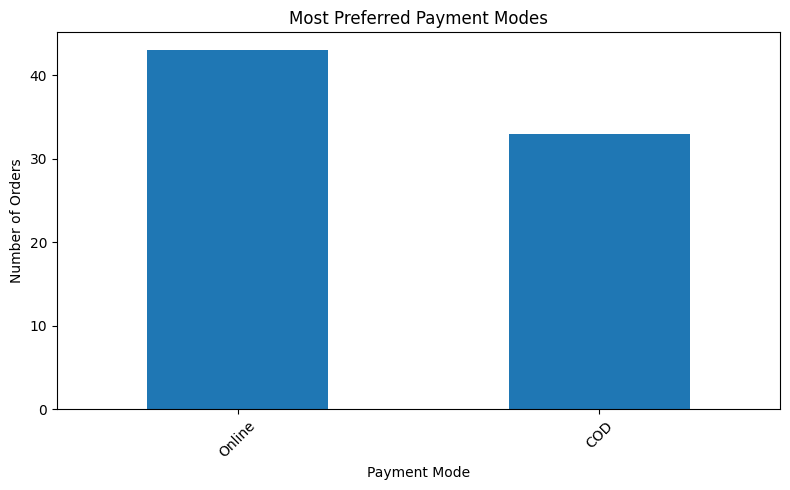

In [104]:
# 16. Determine the most preferred payment modes
payment_mode_counts = order_data['payment_mode'].value_counts()
print(payment_mode_counts)
plt.figure(figsize=(8, 5))


payment_mode_counts.plot(kind='bar', color='#1f77b4')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [89]:
# Time-based Analysis:

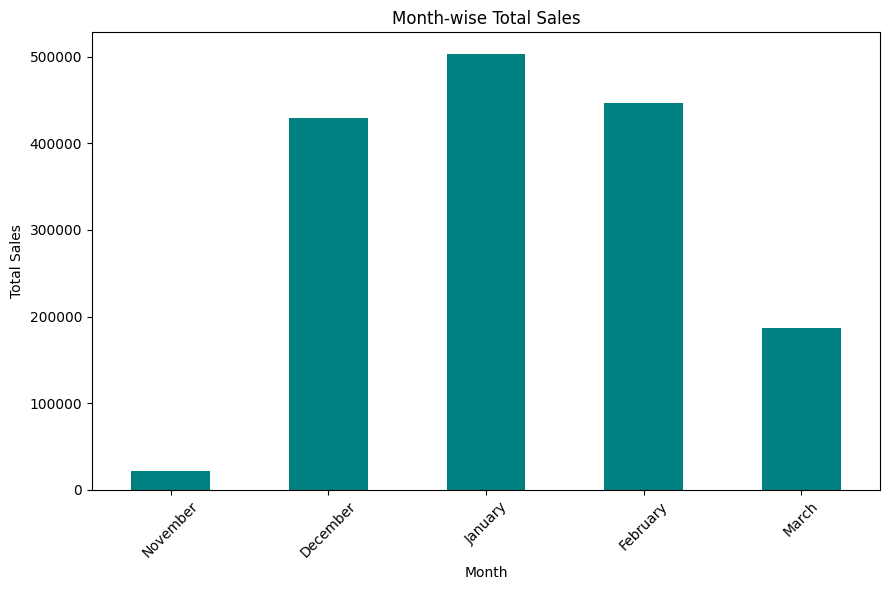

In [154]:
# 17. Month-wise total sales
order_data['year_month'] = order_data['order_date'].dt.to_period('M')
month_sales = order_data.groupby('year_month')['total_price'].sum()
plt.figure(figsize=(9, 6))
month_sales.index = month_sales.index.astype(str)
month_sales.plot(kind='bar', color='teal')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(len(month_sales)), labels=[pd.to_datetime(m).strftime('%B') for m in month_sales.index], rotation=45)
plt.tight_layout()
plt.show()

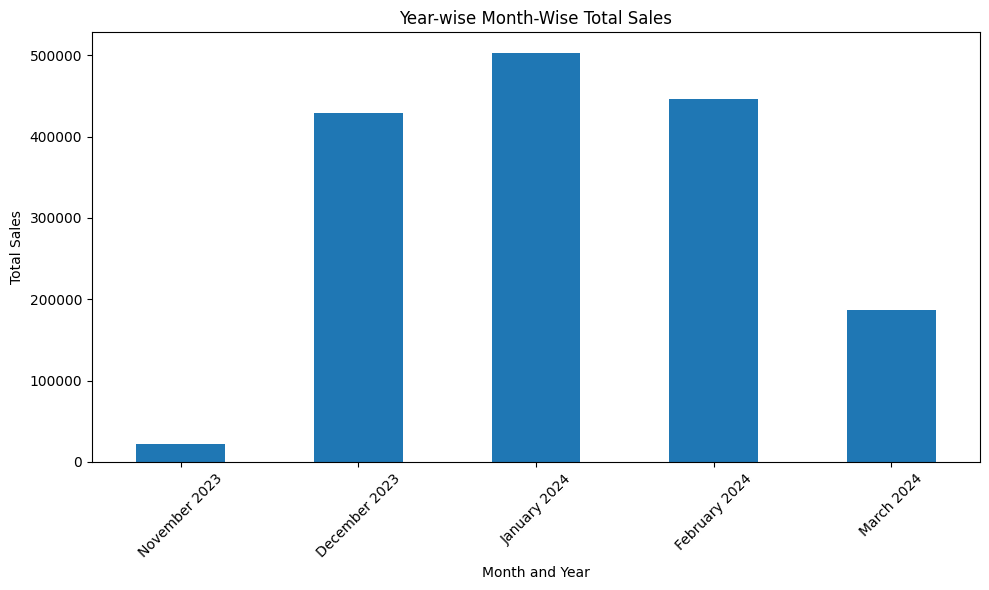

In [131]:
# 18. Month and year-wise total sales
year_month_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum()
plt.figure(figsize=(10, 6))
year_month_sales.index = year_month_sales.index.astype(str)
year_month_sales.plot(kind='bar', color='#1f77b4')
plt.title('Year-wise Month-Wise Total Sales')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(len(year_month_sales)), labels=[pd.to_datetime(m).strftime('%B %Y') for m in month_sales.index], rotation=45)
plt.tight_layout()
plt.show()

Peak Order Date: 2023-11-30 with 2 orders


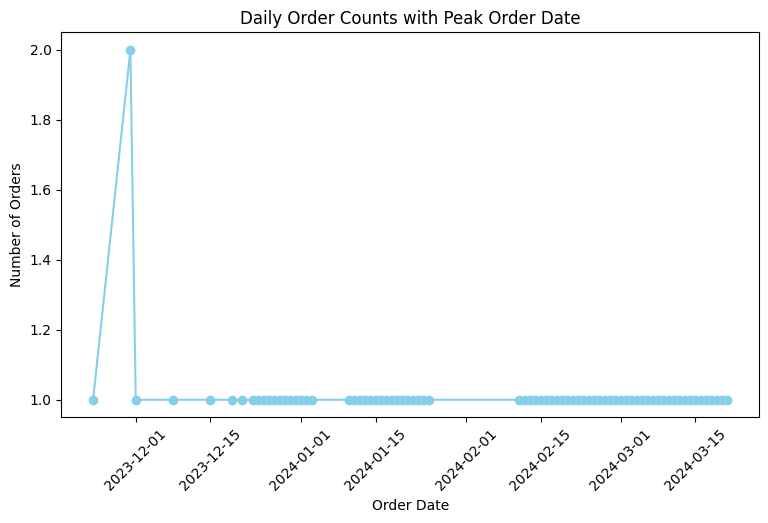

In [153]:
# 19. Identify peak order date
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
daily_order_counts = order_data.groupby(order_data['order_date'].dt.date)['order_id'].count()
peak_order_date = daily_order_counts.idxmax()
peak_order_count = daily_order_counts.max()

print(f'Peak Order Date: {peak_order_date} with {peak_order_count} orders')

plt.figure(figsize=(9, 5))
plt.plot(daily_order_counts.index, daily_order_counts.values, marker='o', color='skyblue')
plt.title('Daily Order Counts with Peak Order Date')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Geographical Analysis:

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


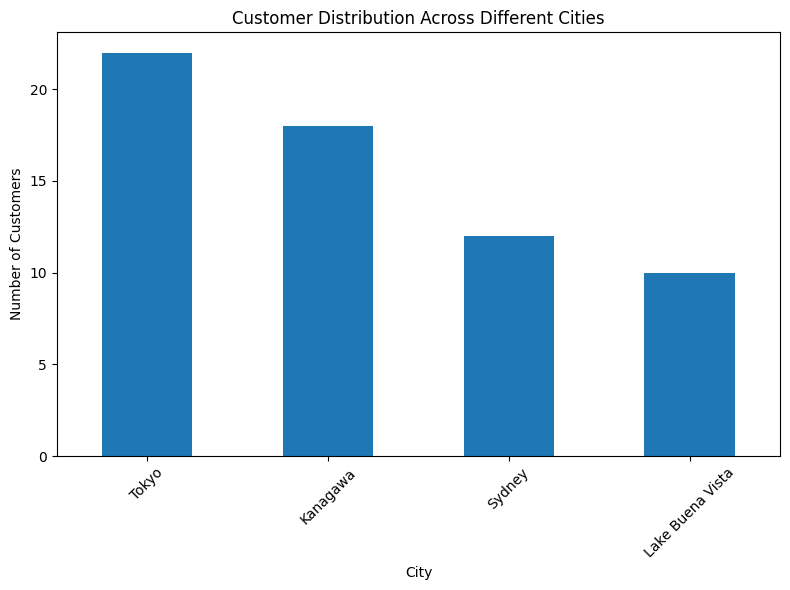

In [160]:
# 20.  Explore the distribution of customers across different cities
city_customer_counts = customer_data['city'].value_counts()
print (city_customer_counts)

plt.figure(figsize=(8, 6))
city_customer_counts.plot(kind='bar', color='#1f77b4')
plt.title('Customer Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 final 
     order_id product_id     category              city
0          3       P112    Furniture             Tokyo
1          4       P102    furniture  Lake Buena Vista
2          5       P102    furniture  Lake Buena Vista
3          7       P103  Electronics          Kanagawa
4          8       P102    furniture          Kanagawa
..       ...        ...          ...               ...
71        91       P159    Appliance             Tokyo
72        92       P160    Appliance  Lake Buena Vista
73        93       P161    Appliance          Kanagawa
74        94       P162  Electronics            Sydney
75        95       P154  Electronics             Tokyo

[76 rows x 4 columns]
category          Appliance  Electronics  Furniture  furniture
city                                                          
Kanagawa                8.0         11.0        5.0        1.0
Lake Buena Vista        4.0          7.0        2.0        2.0
Sydney                  5.0          7.0        2.0     

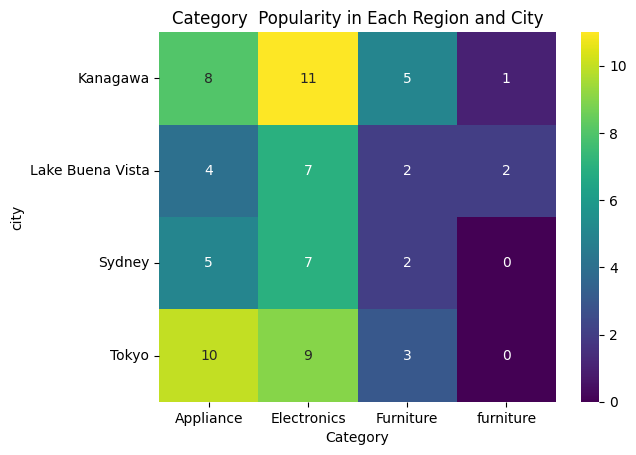

In [162]:
 #21. Analyze whether certain products or categories are more popular in a
# specific city
merged_order_data = pd.merge(order_data, product_data[['product_id', 'category']], on='product_id',how='left')

# merged_order_data 'customer_data' to get city information for each order
final_data=pd.merge(merged_order_data,customer_data[['customer_id', 'city']], on='customer_id',how='left')

# Display the final merged data
print(" final \n", final_data[['order_id','product_id', 'category','city']])

#Analyze populerity of catagories in each region and city
category_region_city_counts = final_data.groupby(['city','category']).size().unstack().fillna(0)

# Display the result
print(category_region_city_counts)

# plotting
sns.heatmap(category_region_city_counts,annot=True, cmap='viridis',fmt='g')
plt.title('Category  Popularity in Each Region and City')
plt.xlabel('Category')
plt.ylabel('city')
plt.show()

In [163]:
#Product Performance

      product_name  quantity
5        Microwave       4.0
3             Desk       4.0
9     Refrigerator       3.0
0            Chair       3.0
4           Tablet       3.0
6       Television       3.0
20      Smartwatch       3.0
14       Desk Lamp       3.0
12  Vacuum Cleaner       3.0
10            Sofa       3.0


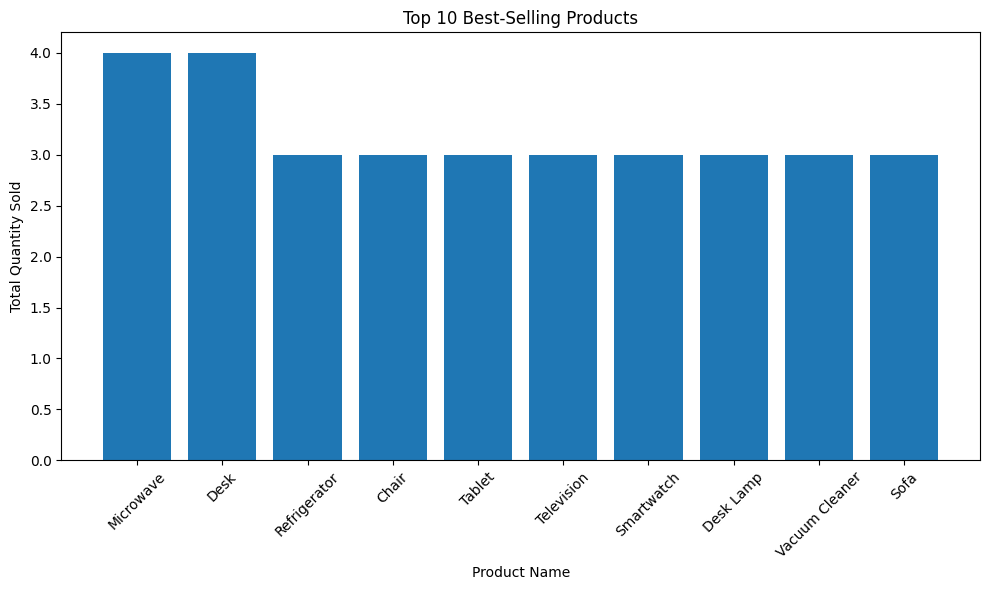

In [175]:
# 22. Identify the best-selling products
best_selling_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
best_selling_products = best_selling_products.merge(product_data, on='product_id')
best_selling_products = best_selling_products.sort_values(by='quantity', ascending=False)
print(best_selling_products[['product_name', 'quantity']].head(10))

plt.figure(figsize=(10, 6))
plt.bar(best_selling_products['product_name'].head(10), best_selling_products['quantity'].nlargest(10), color='#1f77b4')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

      product_name  quantity
15         Printer       1.0
25      Television       1.0
26  Gaming Console       1.0
28  Water Purifier       1.0
21       Projector       1.0
19  Gaming Console       1.0
29          Tablet       1.0
30      Dishwasher       1.0
24      Smartwatch       1.0
16        Recliner       1.0


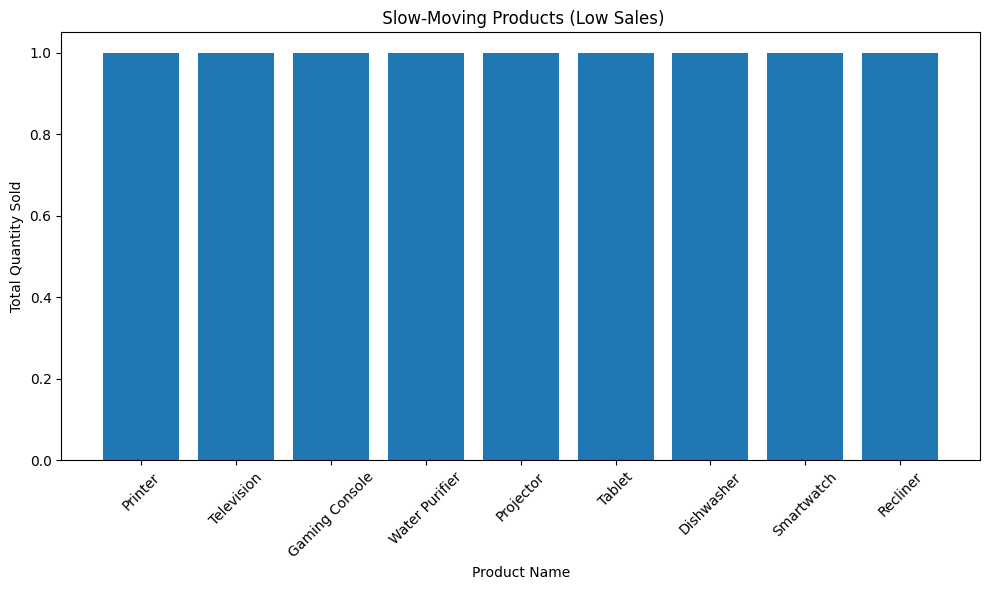

In [181]:
# 23. Identify top 10 slow-moving products based on low sales.
slow_moving_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
slow_moving_products = slow_moving_products.merge(product_data, on='product_id')
slow_moving_products = slow_moving_products.sort_values(by='quantity', ascending=True)
print(slow_moving_products[['product_name', 'quantity']].head(10))

plt.figure(figsize=(10, 6))
plt.bar(slow_moving_products['product_name'].head(10), slow_moving_products['quantity'].head(10), color='#1f77b4')
plt.title(' Slow-Moving Products (Low Sales)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [182]:
#Payment Analysis

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


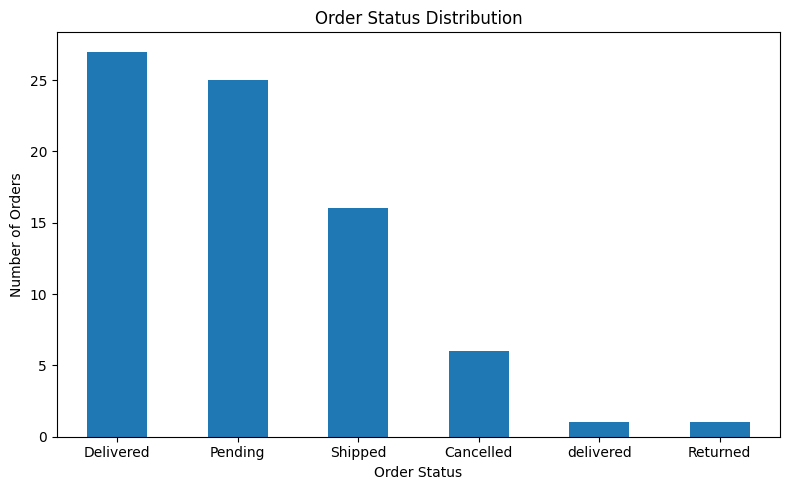

In [188]:
# 24. Display successful and pending payments order counts
payment_status_counts = order_data['order_status'].value_counts()
print(payment_status_counts)

plt.figure(figsize=(8, 5))
payment_status_counts.plot(kind='bar', color=['#1f77b4'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [189]:
# Close Database Connection
cursor.close()
connection.close()